In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [4]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [7]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 49s 49ms/step - loss: 2.3639 - accuracy: 0.3903 - val_loss: 0.7117 - val_accuracy: 0.8207
Epoch 2/15
981/981 [==============================] - 47s 48ms/step - loss: 0.9126 - accuracy: 0.7338 - val_loss: 0.3927 - val_accuracy: 0.9017
Epoch 3/15
981/981 [==============================] - 47s 48ms/step - loss: 0.6517 - accuracy: 0.8049 - val_loss: 0.2230 - val_accuracy: 0.9333
Epoch 4/15
981/981 [==============================] - 48s 48ms/step - loss: 0.5197 - accuracy: 0.8442 - val_loss: 0.1904 - val_accuracy: 0.9551
Epoch 5/15
981/981 [==============================] - 48s 49ms/step - loss: 0.4068 - accuracy: 0.8793 - val_loss: 0.1815 - val_accuracy: 0.9514
Epoch 6/15
981/981 [==============================] - 48s 49ms/step - loss: 0.3443 - accuracy: 0.8976 - val_loss: 0.1196 - val_accuracy: 0.9652
Epoch 7/15
981/981 [==============================] - 48s 49ms/step - loss: 0.3092 - accuracy: 0.9075 - val_loss: 0.0985 - val_accuracy:

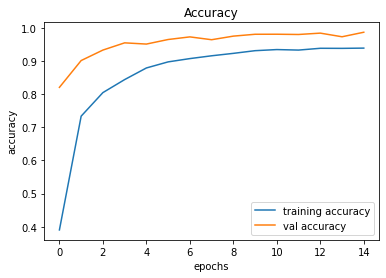

In [9]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

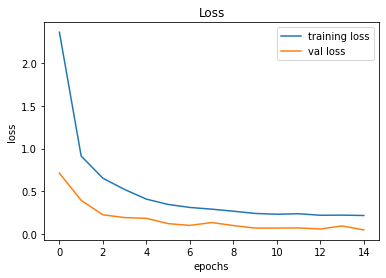

In [10]:

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [34]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict(X_test)

np.set_printoptions(precision = 2)

pred_classes = np.argmax(pred,axis=1)

#Accuracy with the test data
from sklearn.metrics import accuracy_score

print(accuracy_score(labels, pred_classes))

395/395 [==============================] - 3s 8ms/step
0.9456057007125891


In [17]:
model.save('traffic_classifier.h5')